# Title

**Bagging vs Random Forest (Tree correlation)**

# Description

## How does Random Forest improve on Bagging?
The goal of this exercise is to investigate the correlation between randomly selected trees from Bagging and Random Forest. 

# Instructions:
- Read the dataset `diabetes.csv` as a pandas dataframe, and take a quick look at the data.
- Split the data into train and validation sets.
- Define a `BaggingClassifier` model that uses `DecisionTreClassifier` as its base estimator.
- Specify the number of bootstraps as 1000 and a maximum depth of 3.
- Fit the `BaggingClassifier` model on the train data.
- Use the helper code to predict using the mean model and individual estimators. The plot will look similar to the one given below.
- Predict on the test data using the first estimator and the mean model.
- Compute and display the validation accuracy
- Repeat the modeling and classification process above, this time using a `RandomForestClassifier`.


# Hints:
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a> : Split arrays or matrices into random train and test subsets.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html" target="_blank">sklearn.ensemble.BaggingClassifier()</a> : Returns a Bagging classifier instance.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">sklearn.tree.DecisionTreeClassifier()</a> : A Tree classifier can be used as the base model for the Bagging classifier.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank">sklearn.ensemble.RandomForestClassifier()</a> : Defines a Random forest classifier.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html" target="_blank">sklearn.metrics.accuracy_score(y_true, y_pred)</a> : Accuracy classification score. 

In [1]:
# Import the main packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from dtreeviz.trees import dtreeviz

%matplotlib inline

colors = [None,  # 0 classes
          None,  # 1 class
          ['#FFF4E5','#D2E3EF'],# 2 classes
           ]

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [2]:
# Read the dataset and take a quick look

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
### edTest(test_assign) ###
# Assign the predictor and response variables. 
# "Outcome" is the response and all the other columns are the predictors

X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [4]:
# Fix a random_state and split the data 
# into train and validation sets

random_state = 144

X_train, X_val, y_train,y_val = train_test_split(X,y,
                                train_size = 0.8,
                                random_state =random_state)


## Bagging Implementation

In [5]:
# Define a Bagging classifier with randon_state as above
# and with a DecisionClassifier as a basemodel
# We fix the max_depth variable to 20 for all trees
max_depth = 20

# Set the maximum depth to be max_depth and use 100 estimators
n_estimators = 1000
basemodel = DecisionTreeClassifier(max_depth=max_depth, 
                random_state=42)

bagging = BaggingClassifier(base_estimator=basemodel, n_estimators=n_estimators)
# Fit the model on the training set

bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                        random_state=42),
                  n_estimators=1000)

In [6]:
### edTest(test_bagging) ###
# We make predictions on the validation set 

predictions = bagging.predict(X_val)

# compute the accuracy on the validation set

acc_bag = round(accuracy_score(predictions, y_val),2)

print(f'For Bagging, the accuracy on the validation set is {acc_bag}')

For Bagging, the accuracy on the validation set is 0.77


## Random Forest implementation

In [7]:
# Define a Random Forest classifier with randon_state as above

# Set the maximum depth to be max_depth and use 100 estimators

random_forest = RandomForestClassifier(max_depth=max_depth, 
                    random_state=random_state, 
                    n_estimators=n_estimators)

# Fit the model on the training set
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=1000, random_state=144)

In [8]:
### edTest(test_RF) ###
# We make predictions on the validation set 

predictions = random_forest.predict(X_val)

# compute the accuracy on the validation set

acc_rf = round(accuracy_score(predictions, y_val),2)

print(f'For Random Forest, the accuracy on the validation set is {acc_rf}')

For Random Forest, the accuracy on the validation set is 0.79


## Visualizing the trees - Bagging

In [9]:
# Reducing the max_depth for visualization 

max_depth = 3

basemodel = DecisionTreeClassifier(max_depth=max_depth, 
                                random_state=random_state)

bagging = BaggingClassifier(base_estimator=basemodel, 
                                n_estimators=1000)

# Fit the model on the training set

bagging.fit(X_train, y_train)

# Selecting two trees at random

bagvati1 = bagging.estimators_[0]
bagvati2 = bagging.estimators_[100]

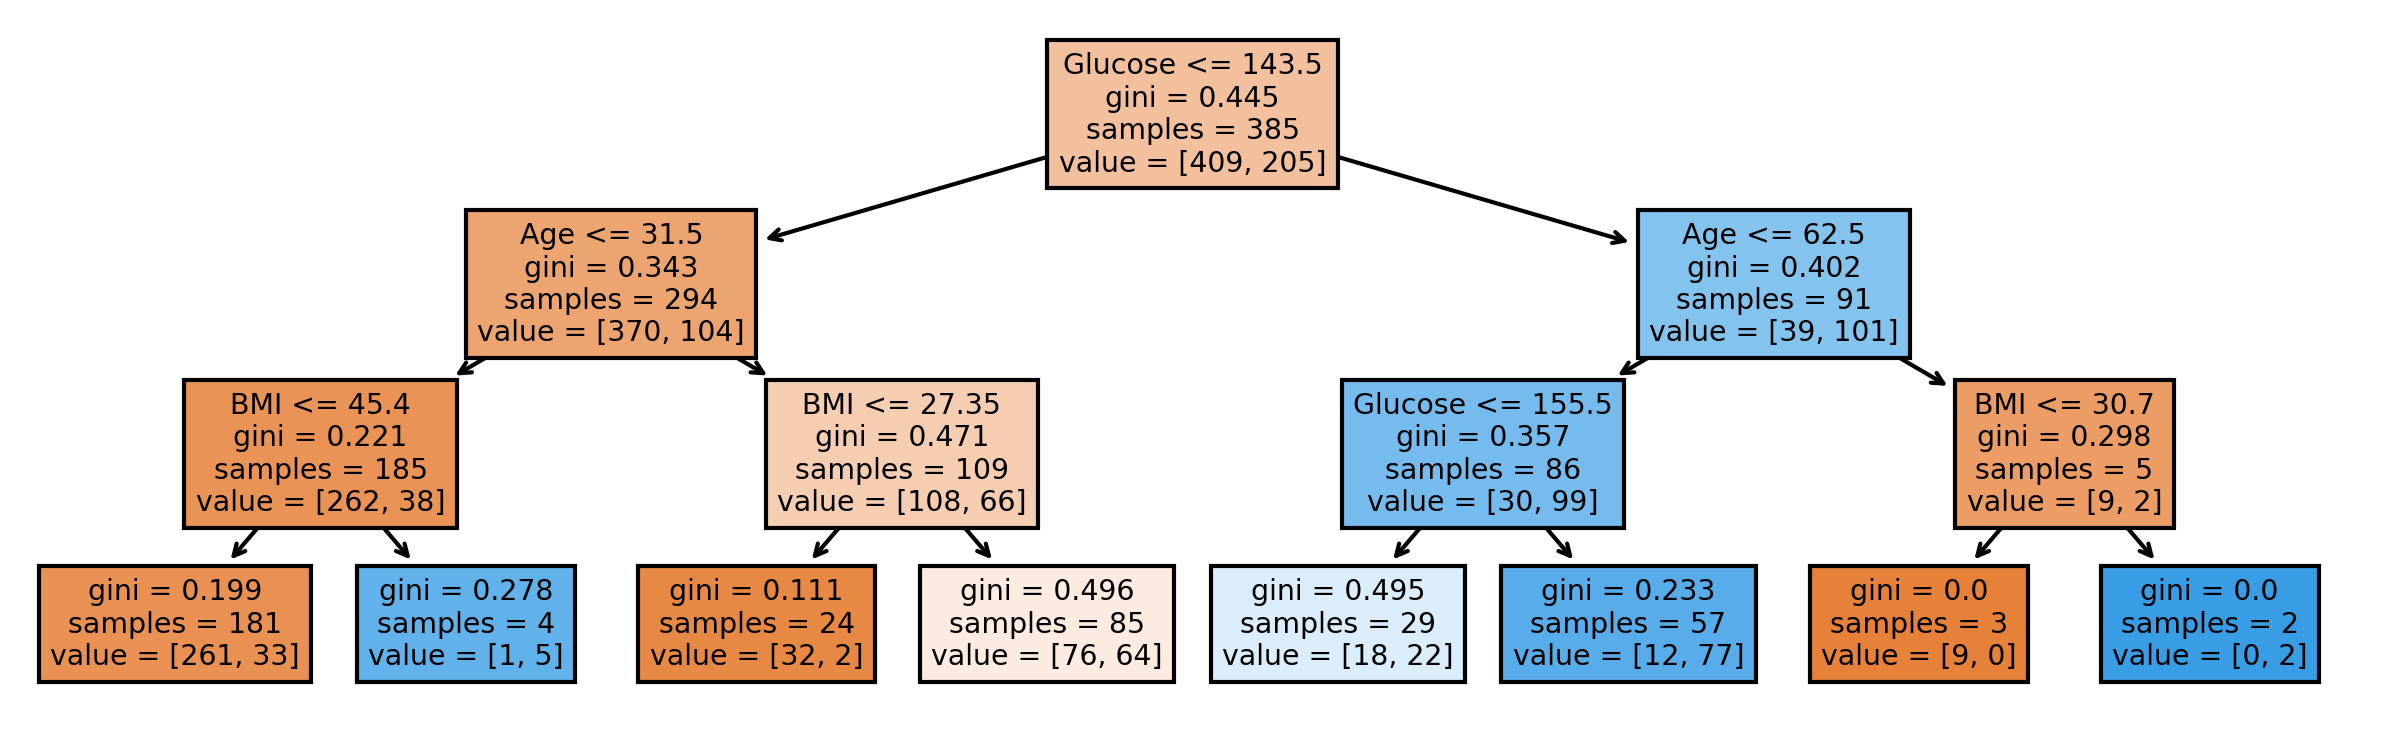

In [10]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(bagvati1, feature_names=df.columns[:8], filled=True)

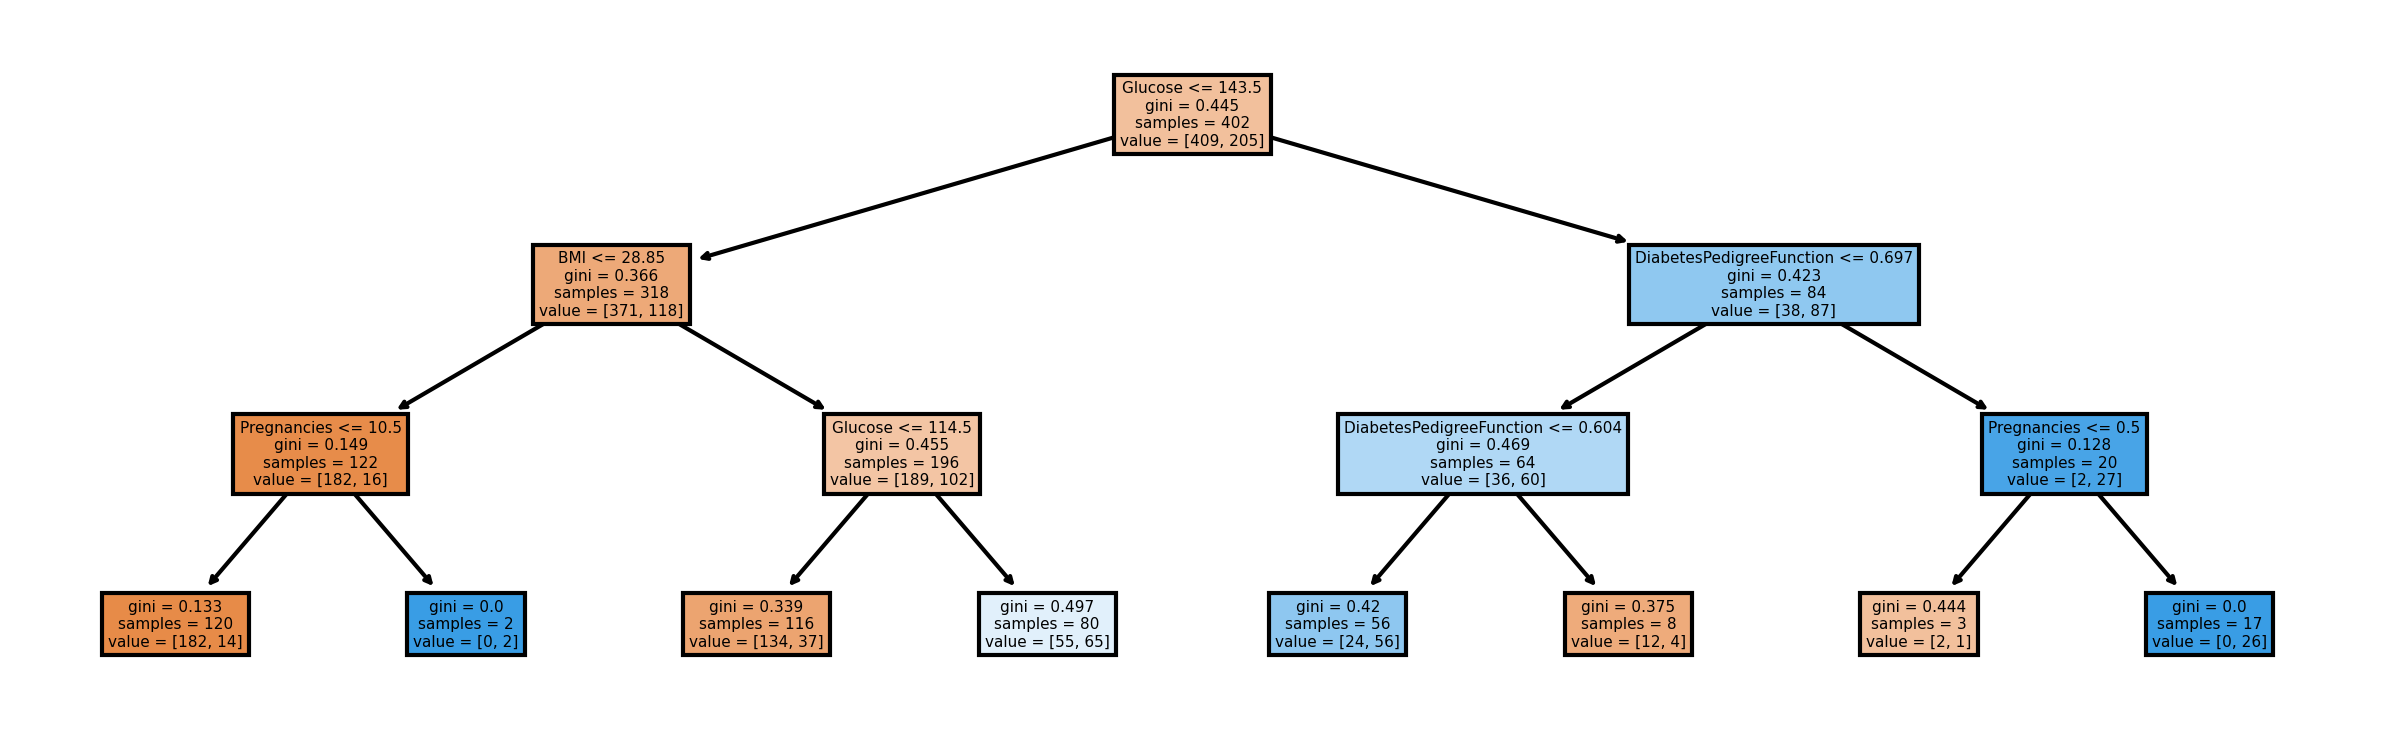

In [11]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(bagvati2, feature_names=df.columns[:8], filled=True)

## Visualizing the trees - Random Forest

In [12]:
# Reducing the max_depth for visualization 

max_depth = 3

random_forest = RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=1000,max_features = "sqrt")

# Fit the model on the training set

random_forest.fit(X_train, y_train)

# Selecting two trees at random

forestvati1 = random_forest.estimators_[0]
forestvati2 = random_forest.estimators_[100]

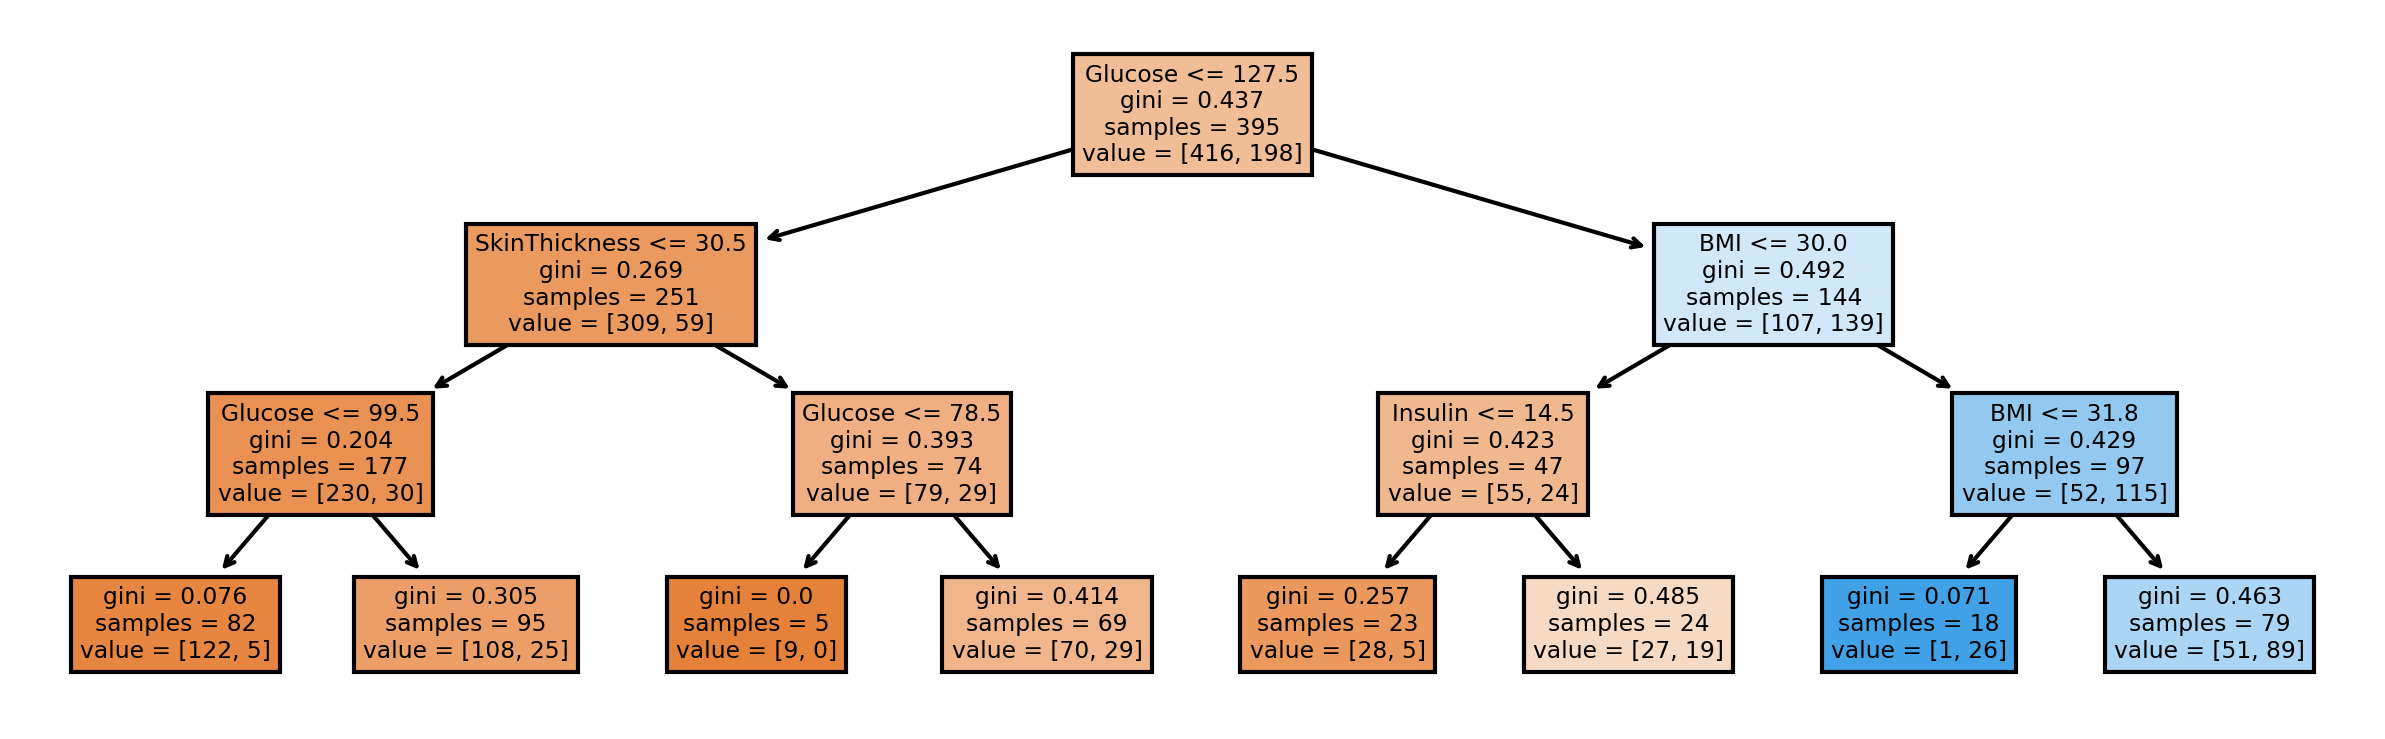

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(forestvati1, feature_names=df.columns[:8], filled=True)

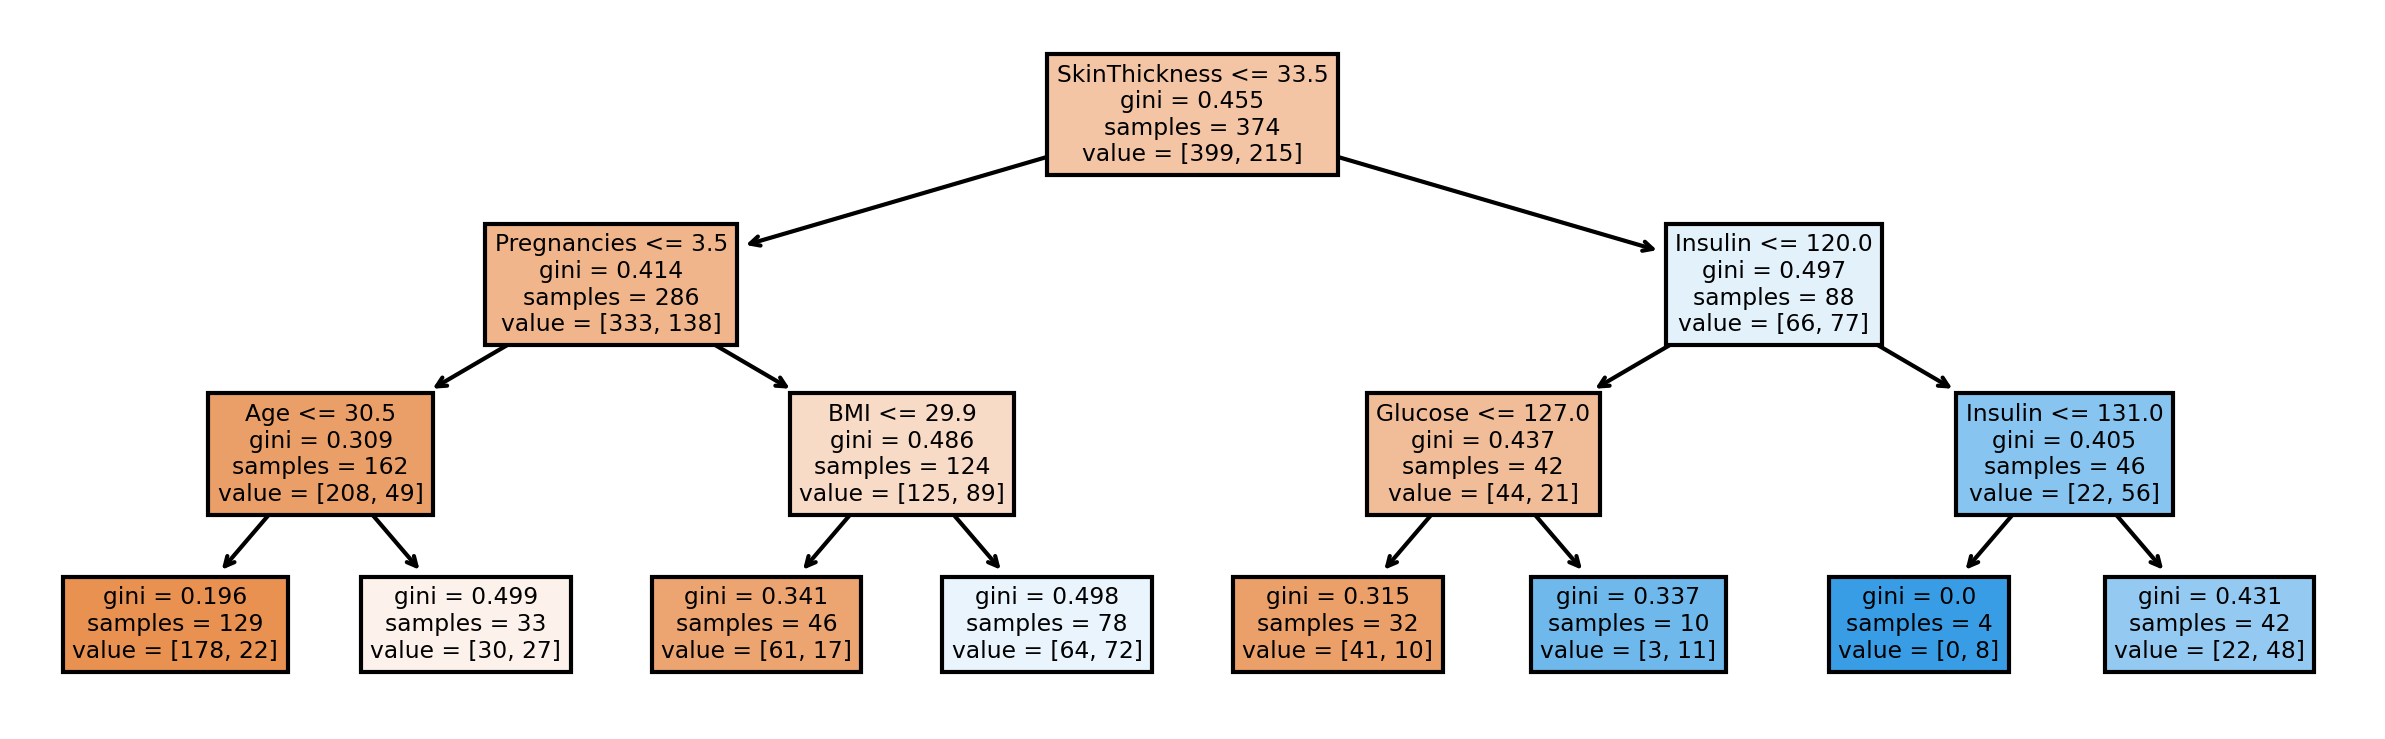

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(forestvati2, feature_names=df.columns[:8], filled=True)

## Mindchow 🍲

- Change the `max_depth` of Bagging and Random Forest to see different trees. Which one gives different trees?
- Change the `max_features` in `RandomForestClassifier` to 8. How is it affecting the correlation between the trees?



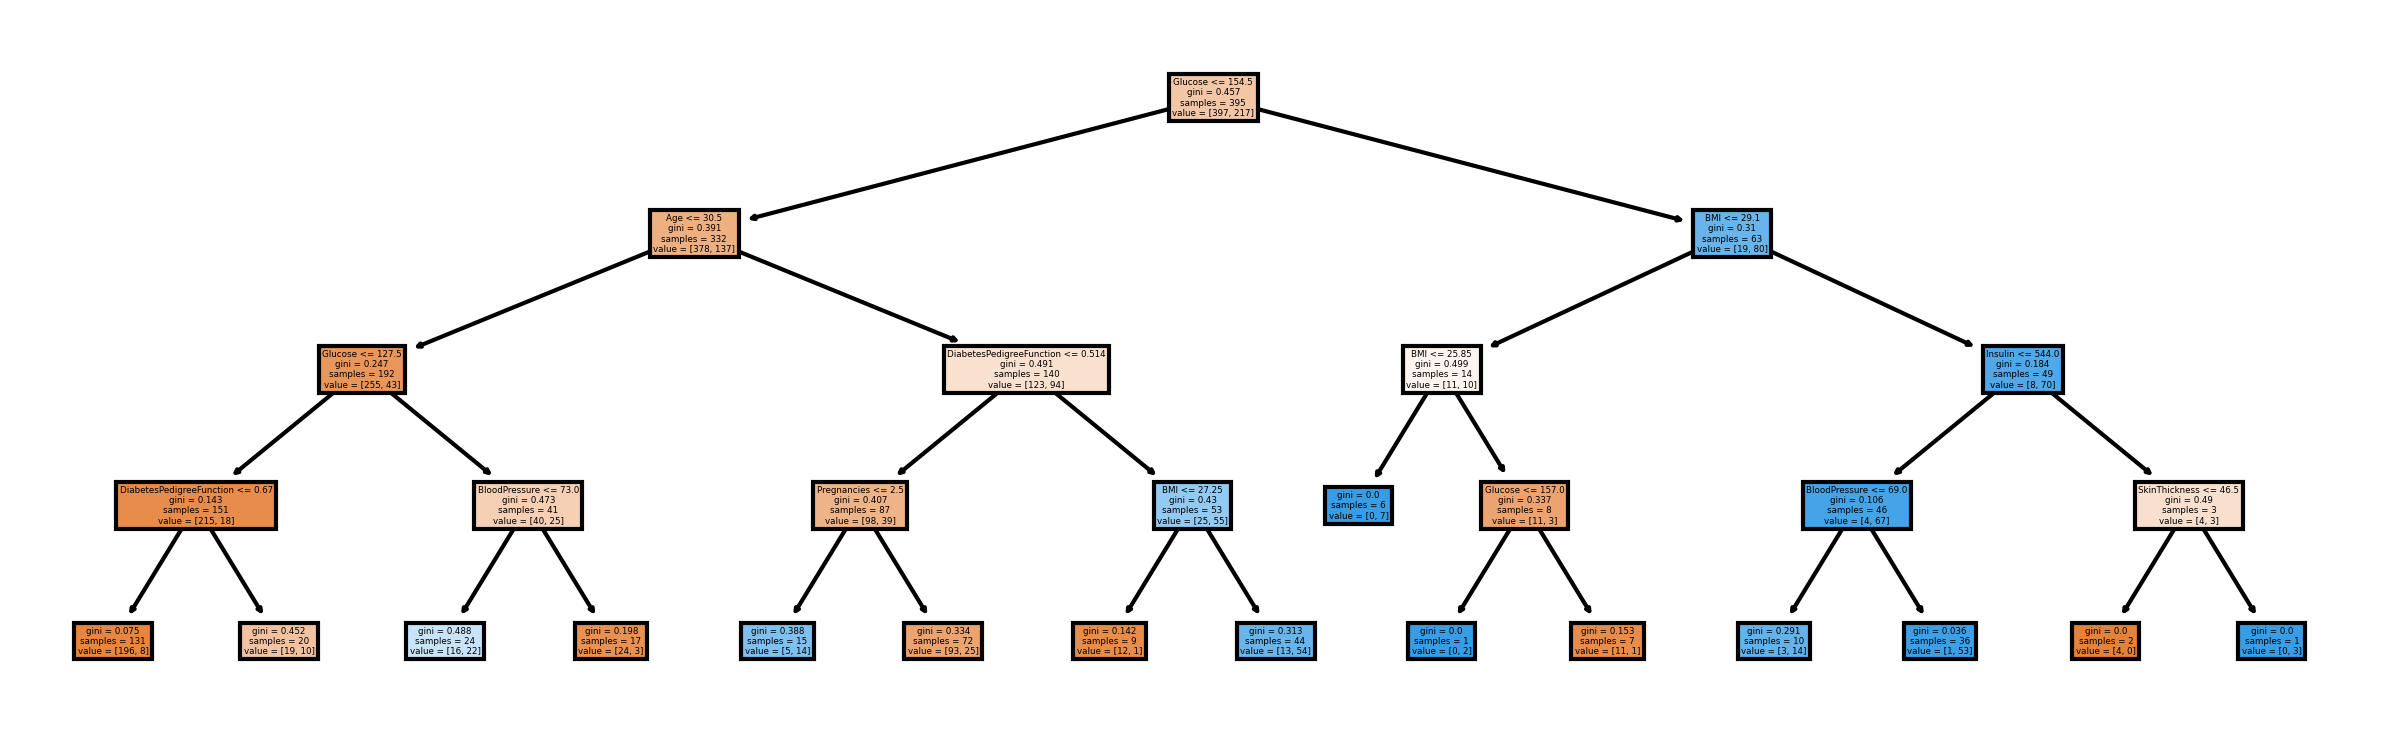

In [15]:
# Reducing the max_depth for visualization 

max_depth = 4

basemodel = DecisionTreeClassifier(max_depth=max_depth, 
                                random_state=random_state)

bagging = BaggingClassifier(base_estimator=basemodel, 
                                n_estimators=1000)

# Fit the model on the training set

bagging.fit(X_train, y_train)

# Selecting two trees at random

bagvati1 = bagging.estimators_[0]
bagvati2 = bagging.estimators_[100]

plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(bagvati1, feature_names=df.columns[:8], filled=True)

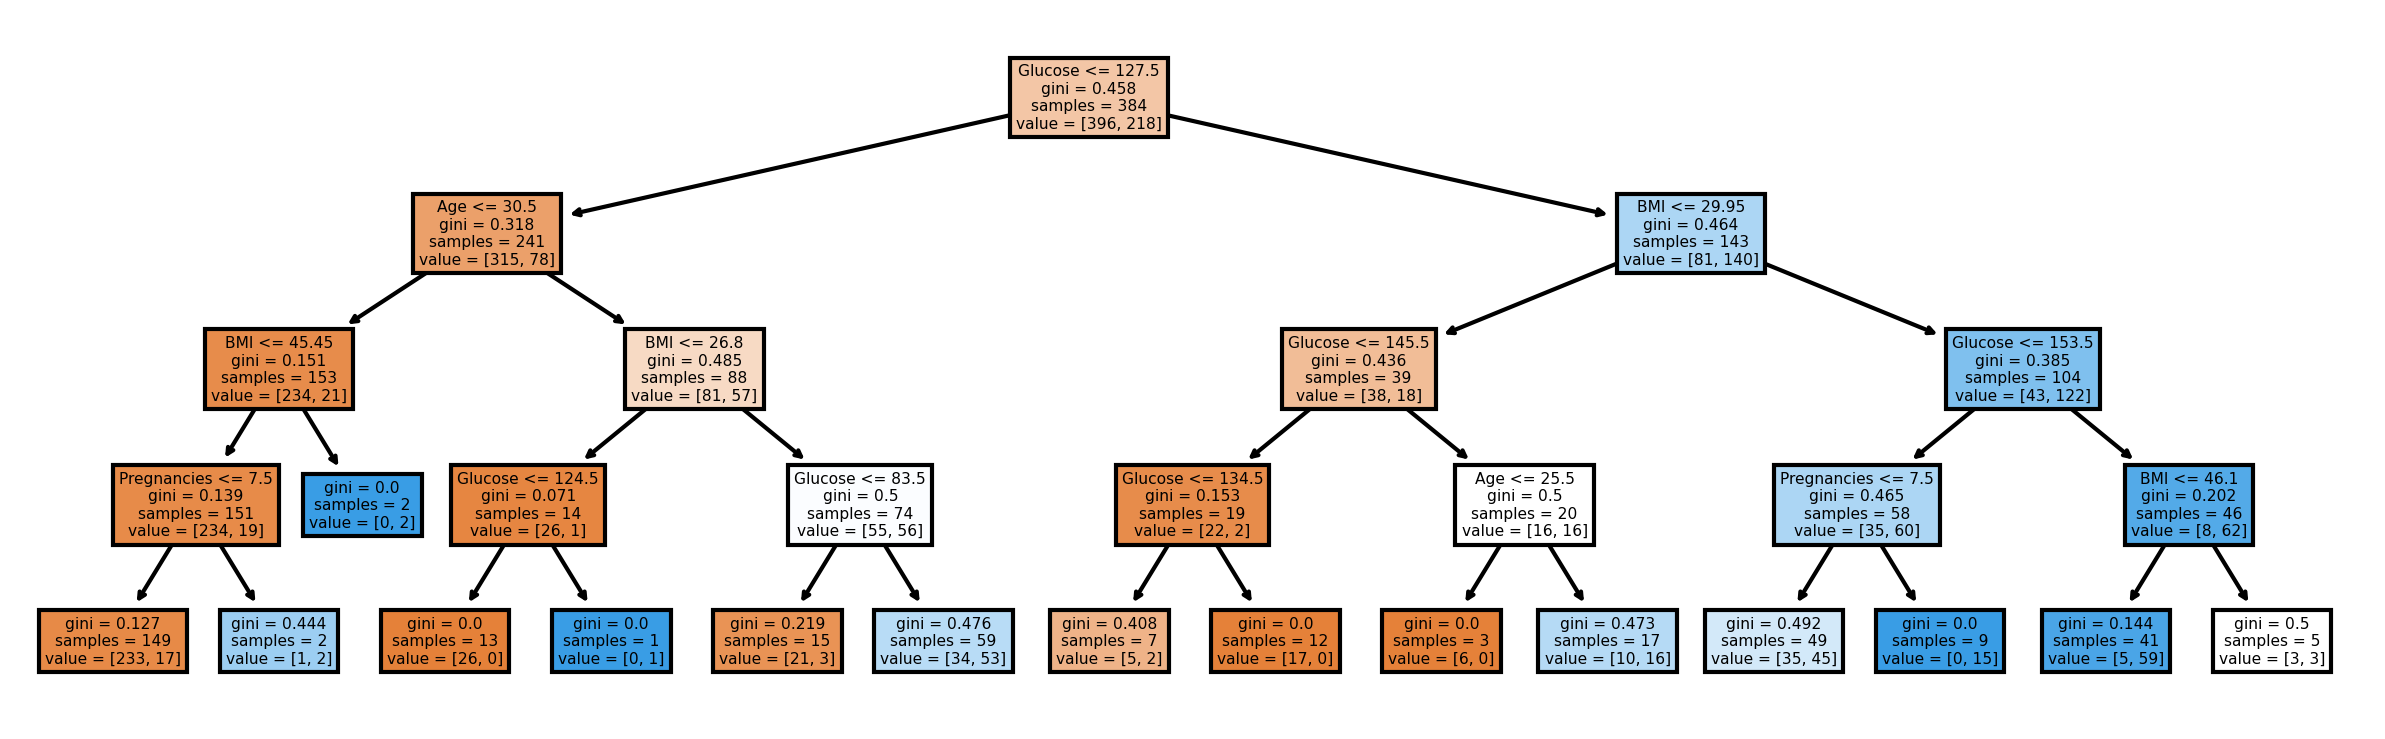

In [16]:
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(bagvati2, feature_names=df.columns[:8], filled=True)

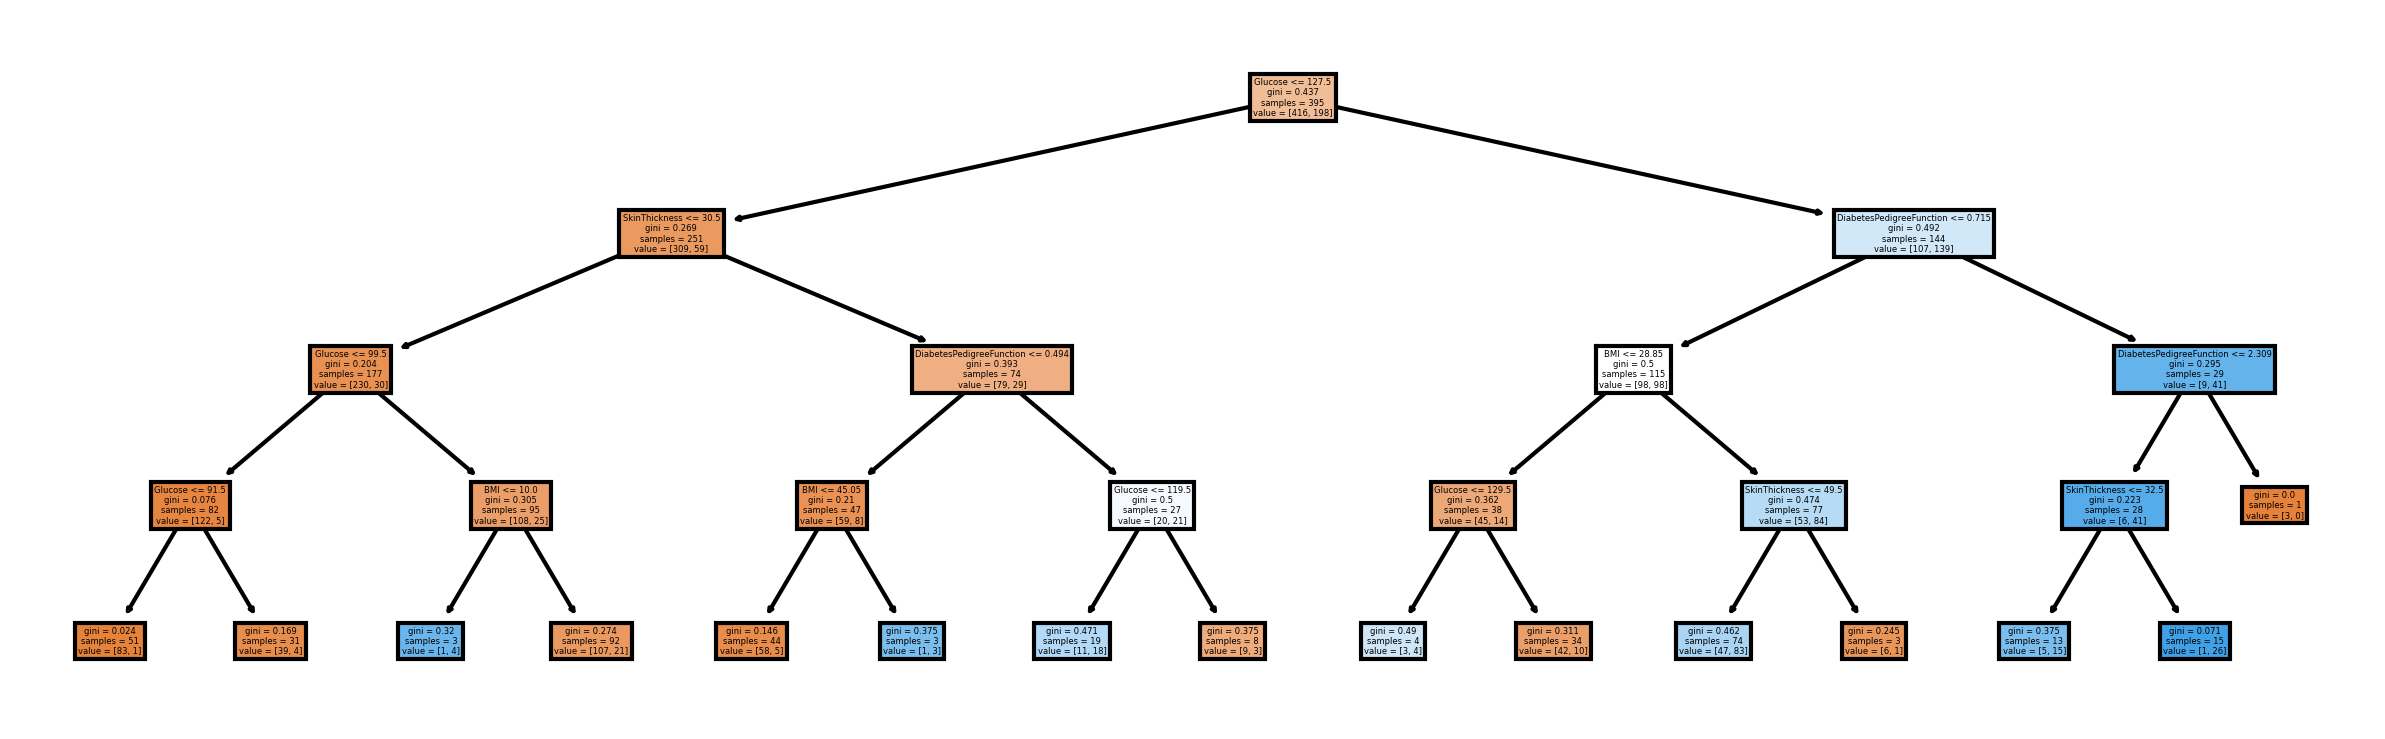

In [17]:
# Reducing the max_depth for visualization 

max_depth = 4

random_forest = RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=1000,max_features = "sqrt")

# Fit the model on the training set

random_forest.fit(X_train, y_train)

# Selecting two trees at random

forestvati1 = random_forest.estimators_[0]
forestvati2 = random_forest.estimators_[100]
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(forestvati1, feature_names=df.columns[:8], filled=True)

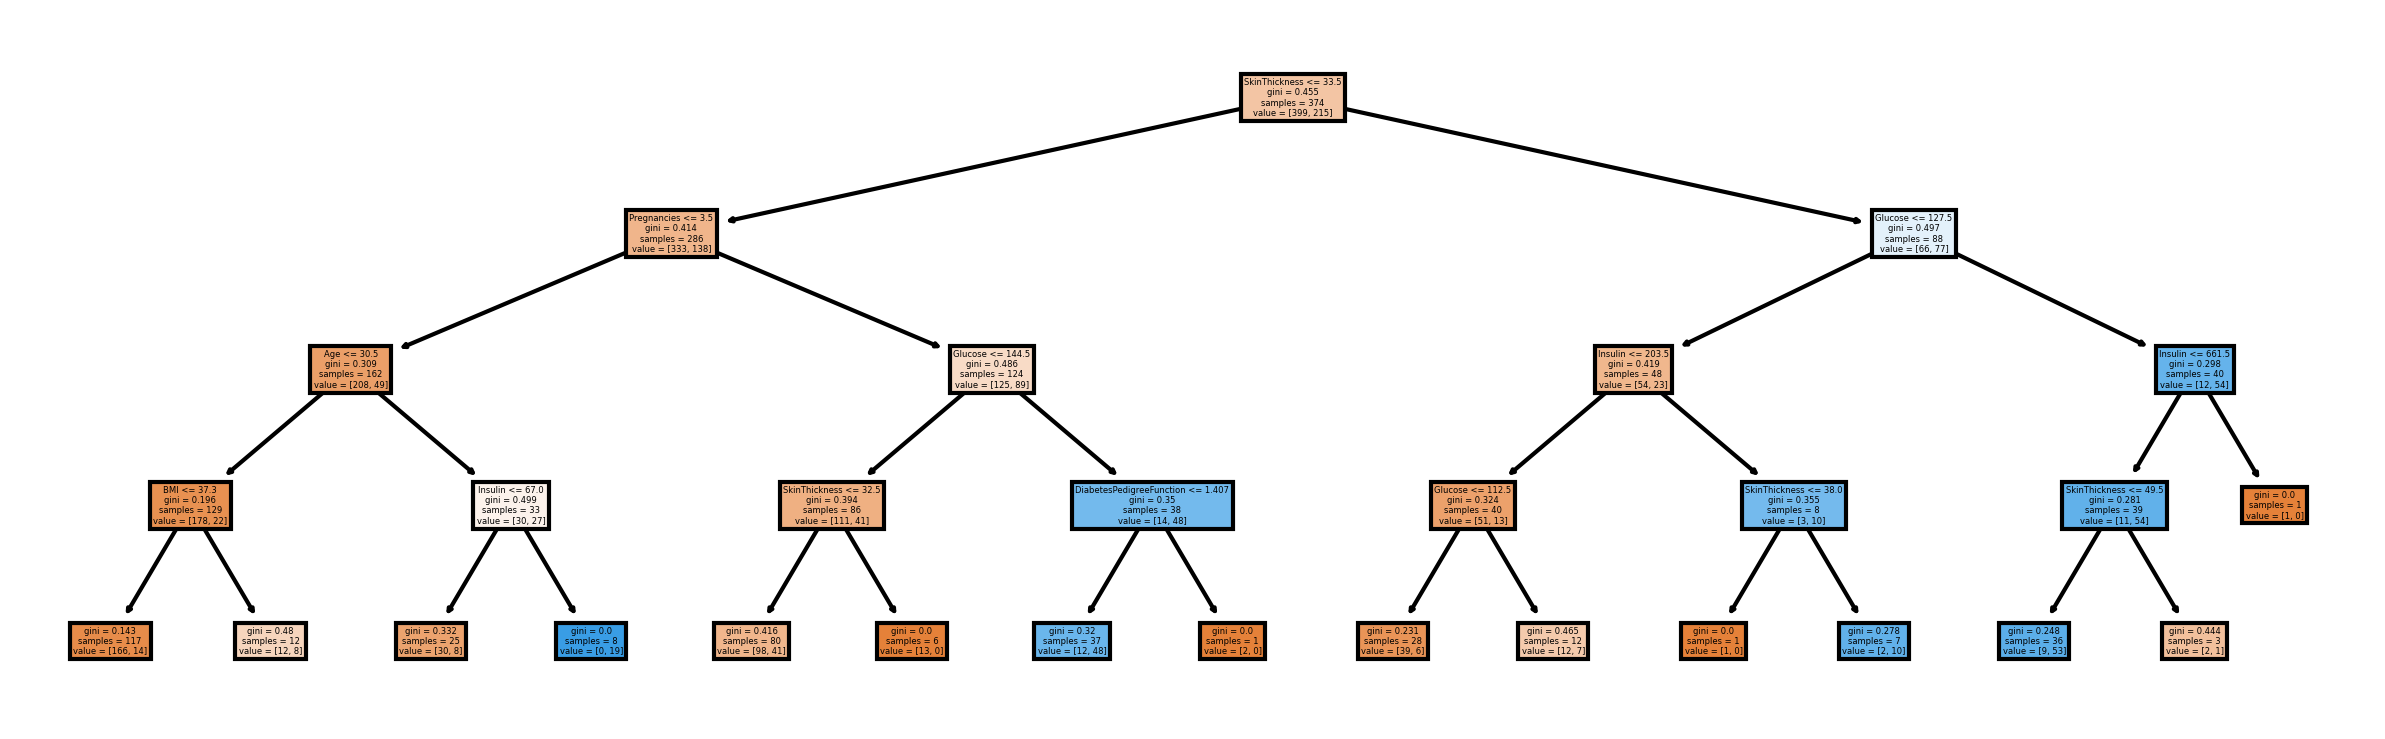

In [18]:
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(forestvati2, feature_names=df.columns[:8], filled=True)

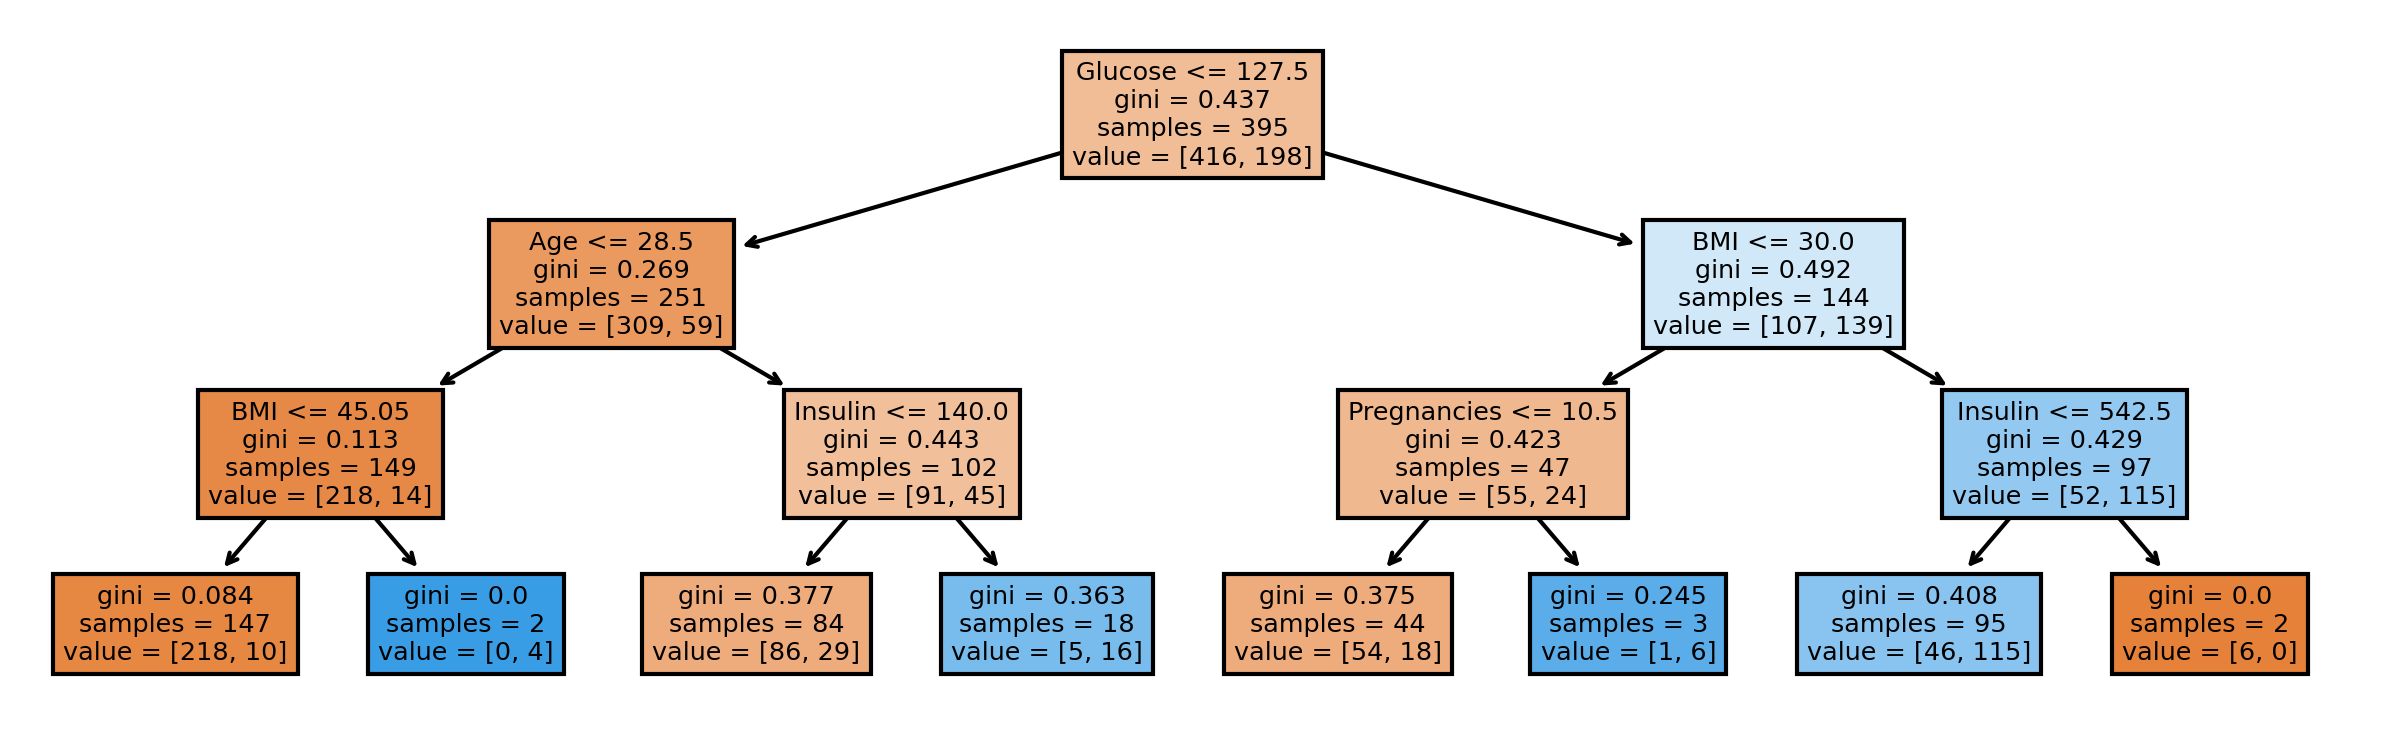

In [19]:
# Reducing the max_depth for visualization 

max_depth = 3

random_forest = RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=1000,max_features = 8)

# Fit the model on the training set

random_forest.fit(X_train, y_train)

# Selecting two trees at random

forestvati1 = random_forest.estimators_[0]
forestvati2 = random_forest.estimators_[100]
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(forestvati1, feature_names=df.columns[:8], filled=True)

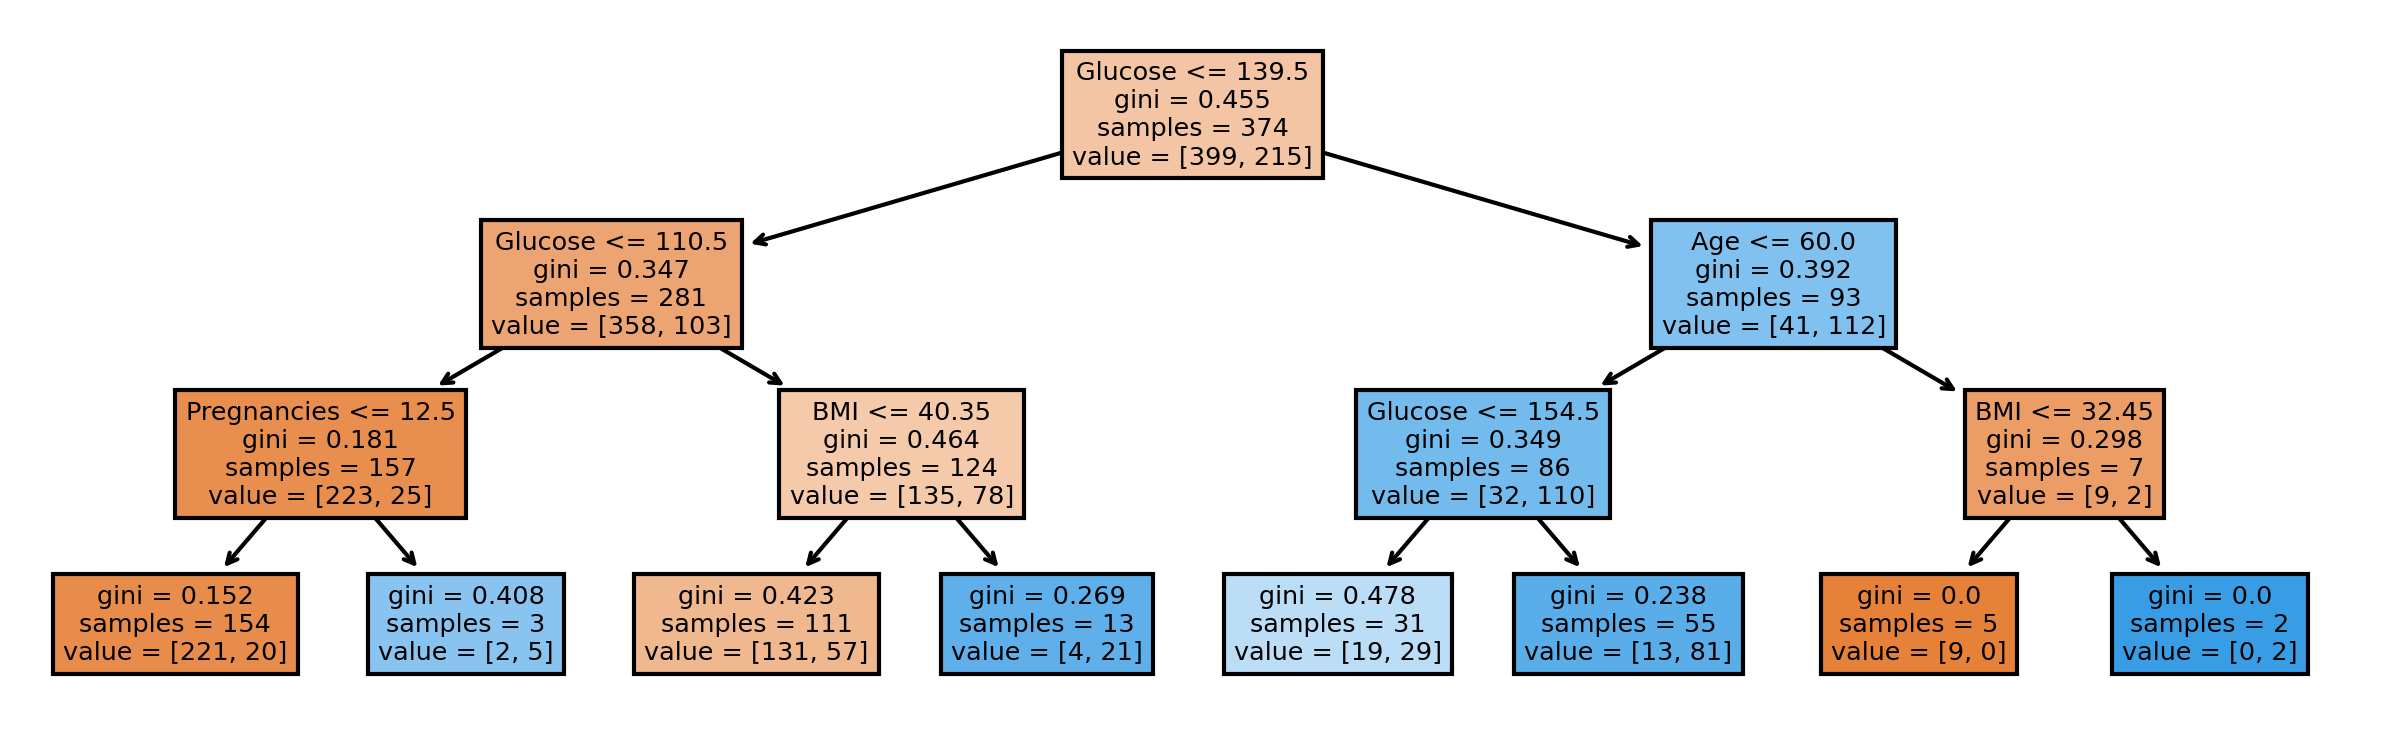

In [20]:
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(forestvati2, feature_names=df.columns[:8], filled=True)